use library [pylibtiff](https://github.com/pearu/pylibtiff.git) to read labelx.tif

after clone it by git, you should add one line code like 

```python
xrange = range
```

follow the `__all__` variable at libtiff_ctypes.py, and then install it.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from libtiff import TIFF
import random
import os
from IPython.display import clear_output

In [28]:
def read_tif(file_path, resize=None, print_log=True):
    """
    
    参数
        file_path tif文件路径
        resize 对加载进来的图片进行resize操作，参数值为(w, h)或(w, h, c)格式的数组。该值默认为None, 表示不进行此项操作。
        print_log 是否打印图片信息 默认True
    """
    tif = TIFF.open(file_path, mode='r')
    image = tif.read_image()
    if not (resize is None):
        image = cv2.resize(image, resize)
    if print_log:
        print(image.shape)
    return image

In [29]:
def get_wh(image):
    h, w = image.shape[:2]
    return w, h

In [30]:
def load_labelx(file_path, resize):
    labelx = read_tif(file_path, resize=resize)
    labelx[labelx < 128] = 0
    labelx[labelx > 128] = 255
    return labelx

In [31]:
# im = cv2.imread('data/segmentation_data/clip1.tif')
clipx = read_tif('data/segmentation_data/clip10.tif')
w, h = get_wh(clipx)
labelx = load_labelx('data/segmentation_data/label10.tif', (w, h))

(1976, 3890, 3)
(1976, 3890)


(array([  206187.,   159392.,   393541.,   557160.,  1263788.,   934586.,
         1319435.,   655032.,  1940806.,  1622648.,  2413889.,  1417426.,
         1002872.,   975213.,   919941.,  1005353.,  1075913.,   682336.,
         1744273.,   906007.,   387121.,   573479.,   320588.,   139038.,
          120360.,    65988.,    39744.,    39155.,    29767.,   148882.]),
 array([   0. ,    8.5,   17. ,   25.5,   34. ,   42.5,   51. ,   59.5,
          68. ,   76.5,   85. ,   93.5,  102. ,  110.5,  119. ,  127.5,
         136. ,  144.5,  153. ,  161.5,  170. ,  178.5,  187. ,  195.5,
         204. ,  212.5,  221. ,  229.5,  238. ,  246.5,  255. ]),
 <a list of 30 Patch objects>)

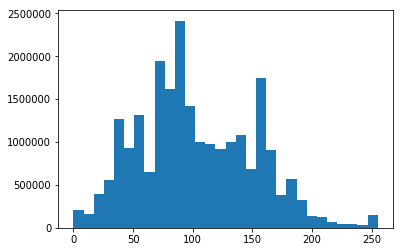

In [32]:
plt.hist(np.ravel(clipx), bins=30)

(array([  5.34533500e+06,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          9.58000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.34034700e+06]),
 array([   0. ,    8.5,   17. ,   25.5,   34. ,   42.5,   51. ,   59.5,
          68. ,   76.5,   85. ,   93.5,  102. ,  110.5,  119. ,  127.5,
         136. ,  144.5,  153. ,  161.5,  170. ,  178.5,  187. ,  195.5,
         204. ,  212.5,  221. ,  229.5,  238. ,  246.5,  255. ]),
 <a list of 30 Patch objects>)

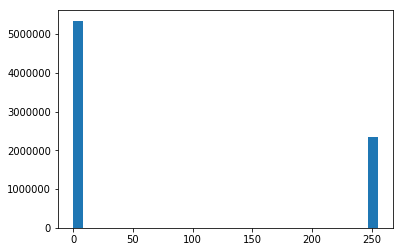

In [33]:
plt.hist(np.ravel(labelx), bins=30)

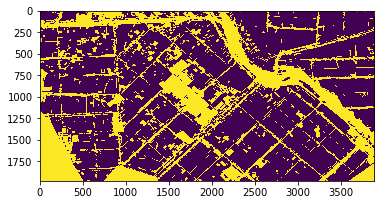

In [34]:
plt.imshow(cv2.resize(labelx, (3890, 1976)))

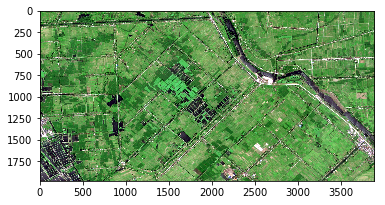

In [35]:
plt.imshow(clipx)

In [36]:
def rand_range(a, b, size=None):
    return (b - a) * np.random.random(size) + a

def random_cut(w, h):
    a = rand_range(0, 0.62)
    b = rand_range(0, 0.62)
    c = rand_range(0.38, 0.99 - a)
    d = rand_range(0.38, 0.99 - b)
    leftup = (int(a * w), int(b * h))
    rightdown = (int((a + c) * w), int((b + d) * h))
    return leftup, rightdown

def cut_image(image, leftup, rightdown):
    image_copy = image.copy()
    sub_image = image_copy[leftup[1]:rightdown[1], leftup[0]:rightdown[0]]
    return sub_image

def display_subimage(image, leftup, rightdown, color=(255, 0, 0)):
    plt.figure(figsize=(10, 10))
    image_copy = image.copy()
    x = cv2.rectangle(image_copy, leftup, rightdown, color, 5)
    plt.imshow(image_copy)

In [37]:
def pair_cut(c, l):
    cw, ch = get_wh(c)
    lw, lh = get_wh(l)
    assert cw == lw and ch == lh
    leftup, rightdown = random_cut(cw, ch)
    sub_clip = cut_image(c, leftup, rightdown)
    sub_label = cut_image(l, leftup, rightdown)
    return sub_clip, sub_label, leftup, rightdown

In [38]:
sub_clip, sub_label, leftup, rightdown = pair_cut(clipx, labelx)

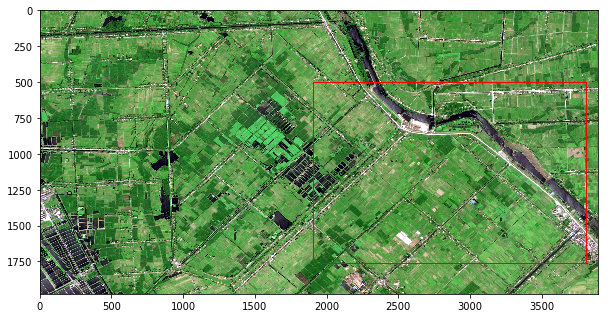

In [39]:
display_subimage(clipx, leftup, rightdown)

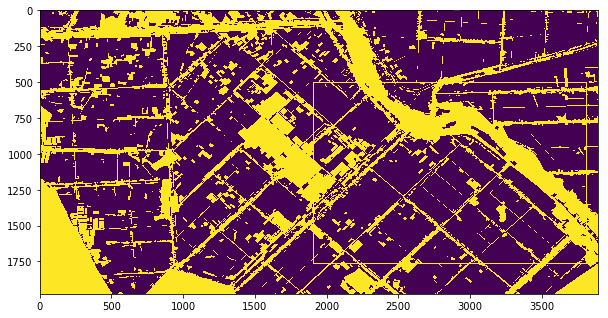

In [40]:
display_subimage(labelx, leftup, rightdown)

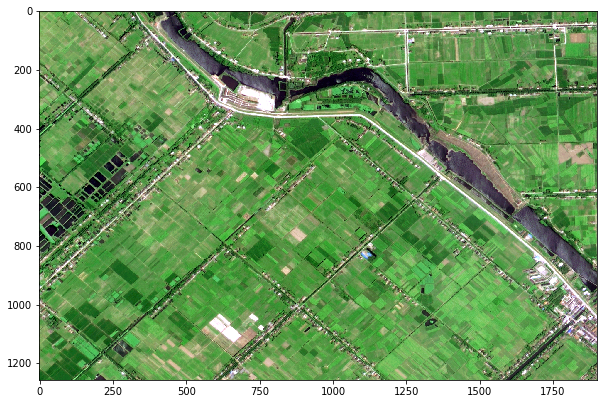

In [41]:
plt.figure(figsize=(10, 10))
plt.imshow(sub_clip)

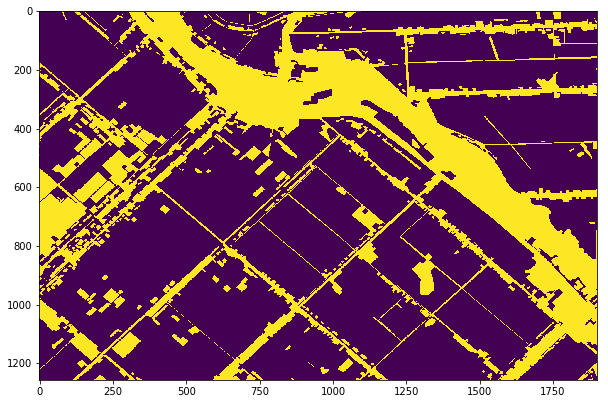

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(sub_label)

In [53]:
# DATA_DIR = "data/segmentation_data/"

for i in range(1, 12):
    clipx = read_tif('data/segmentation_data/clip%d.tif'%i)
    w, h = get_wh(clipx)
    labelx = load_labelx('data/segmentation_data/label%d.tif'%i, (w, h))
    for j in range(100):
        sub_clip, sub_label, leftup, rightdown = pair_cut(clipx, labelx)
        filename = "remote/u-net_data/%d.%s.%s.npz"%(i, leftup, rightdown)
        np.savez_compressed(file=filename, image=sub_clip, label=sub_label)
        print("SAVE %d%% | %s"%(j, filename))
        clear_output(wait=True)

SAVE 99% | remote/u-net_data/11.(286, 561).(1671, 1873).npz


In [54]:
data = np.load("remote/u-net_data/5.(219, 871).(4623, 3418).npz")

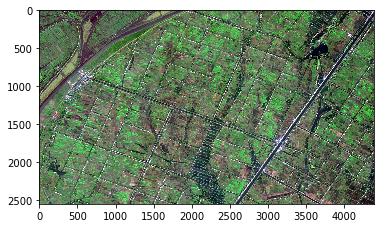

In [57]:
plt.imshow(data['image'])

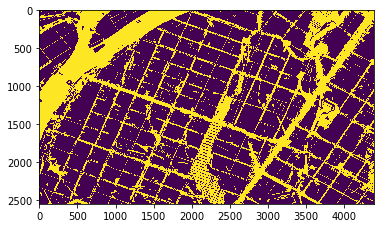

In [58]:
plt.imshow(data['label'])